# Imports

In [1]:


from _dfguru import DataFrameGuru as DFG
from _occupancy_forecasting import load_data

import torch

import numpy as np
import os
dfg = DFG()
torch.cuda.empty_cache()

import ast
import pandas as pd

import matplotlib.pyplot as plt

import datetime
import json

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

from _plotting import DataPlotter


# Utility Functions & Classes

In [2]:
############ Inputs ############
#args = parse_arguments()
#args = prompt_for_missing_arguments(args)0
#n_run = args.n_run
#n_param = args.n_param

################################

path_to_checkpoints = "/home/berni/transfer_from_server/wrap_up_combs_1"
path_to_data = "data/occupancy_forecasting"
path_to_results = "results_wrapup_normal_combs.txt"
helper_path = os.path.join(path_to_data, "helpers_occpred.json")

frequency = "15min"
split_by = "time"


train_dict, val_dict, test_dict = load_data(
    path_to_data_dir=path_to_data, 
    frequency=frequency, 
    split_by=split_by,
    dfguru=dfg,
    with_examweek=False
)


data = train_dict[0]


In [3]:

with open(helper_path, "r") as f:
    helper = json.load(f)       
norm_registered = helper["columns_to_normalize"]["registered"]
norm_temperature = helper["columns_to_normalize"]["tl"]

In [4]:
from _occupancy_forecasting import ResultsAnalyis

path_to_checkpoints = "/home/berni/transfer_from_server/wrap_up_combs_2"
path_to_data = "data/occupancy_forecasting"
path_to_results = "results_wrapup_normal_combs_2.txt"

analyzer = ResultsAnalyis(
    path_to_data=path_to_data,
)

## Load results

In [5]:
# read txt file with training results

#with open(results_filename, "r") as f:
#    lines = f.readlines()
#    line_str = "".join(lines)
    
    
#list_of_runs = line_str.split("\n\n\n")
## remove empty strings
#list_of_runs = [run for run in list_of_runs if run != ""][:-1]
path_to_data = "data/occupancy_forecasting"

paths_to_checkpoints = [
    "/home/berni/transfer_from_server/wrap_up_combs_1",
    "/home/berni/transfer_from_server/wrap_up_combs_2",
    "/home/berni/transfer_from_server/wrap_up_combs_3"
]
paths_to_results = [
    "results_wrapup_normal_combs_1.txt",
    "results_wrapup_normal_combs_2.txt",
    "results_wrapup_normal_combs_3.txt"
]

analyzer = ResultsAnalyis(
    path_to_data=path_to_data,
)

{
    "loss_type": "MAE",
    #"dataset": "test"
    #"frequency": "15min",
    #"lr": "0.001",
    #"batch_size": "32",
    # "with_examweek": "False",
    #"course_encoding_dim": "3",
    #"room_ids": "[0]",
    #"num_layers": "3",
    #"hidden_size": "[32, 32]",
    #"y_horizon": "36",
    #"dataset": "test"
}

parse_results = analyzer.data_preparation(paths_to_results, paths_to_checkpoints)
pivot_results = analyzer.filter_clean_pivot(parse_results, {"loss_type": "MAE"})

In [6]:
pivot_results.value_counts("run_id")

run_id
0    2048
1    2048
2    2048
3    2048
4    2048
Name: count, dtype: int64

### Suggestion:

In [7]:
df_not_grouped = pivot_results.reset_index()
print(df_not_grouped)

       index                        features  run_id  test_loss  val_loss
0          0                         occrate       0   0.020750  0.014838
1          1                         occrate       1   0.021498  0.014637
2          2                         occrate       2   0.021278  0.015374
3          3                         occrate       3   0.021168  0.015118
4          4                         occrate       4   0.021944  0.014877
...      ...                             ...     ...        ...       ...
10235  10235  occrate_weather_type_studyarea       0   0.016993  0.009996
10236  10236  occrate_weather_type_studyarea       1   0.016538  0.010032
10237  10237  occrate_weather_type_studyarea       2   0.016425  0.010276
10238  10238  occrate_weather_type_studyarea       3   0.016699  0.009606
10239  10239  occrate_weather_type_studyarea       4   0.016310  0.009647

[10240 rows x 5 columns]


In [8]:
df_feature_grouped = analyzer.group_by_features(pivot_results).sort_values("mean_test_mae")
df_feature_grouped

,features,mean_validation_mae,std_validation_mae,mean_test_mae,std_test_mae
343,occrate_avgocc_coursenumber_hod_tutorium_test_...,0.008524,0.000284,0.014703,0.000416
373,occrate_avgocc_coursenumber_tutorium_test_canc...,0.008143,0.000112,0.014737,0.000294
370,occrate_avgocc_coursenumber_tutorium_test_canc...,0.008034,0.000223,0.014757,0.000180
23,occrate_avgocc_coursenumber_dow_hod_tutorium_t...,0.008305,0.000300,0.014768,0.000221
342,occrate_avgocc_coursenumber_hod_tutorium_test_...,0.008658,0.000327,0.014773,0.000337
...,...,...,...,...,...
1537,occrate_dow,0.014428,0.000293,0.021907,0.000541
1602,occrate_exam_dow,0.014153,0.000315,0.022002,0.001008
1577,occrate_dow_tutorium_test_cancelled,0.014771,0.000536,0.022033,0.000623
2024,occrate_weather_tutorium_test_cancelled,0.015426,0.000359,0.022208,0.000491


In [9]:
df_subfeature_grouped = analyzer.group_by_subfeatures(pivot_results).sort_values("mean_test_mae")
df_subfeature_grouped

,features,mean_validation_mae,std_validation_mae,mean_test_mae,std_test_mae
1359,occrate_coursenumber_hod_tutorium_test_cancell...,0.008664,0.000326,0.014943,0.000369
1368,occrate_coursenumber_hod_tutorium_test_cancell...,0.008953,0.000265,0.015033,0.000458
342,occrate_avgocc_coursenumber_hod_tutorium_test_...,0.008805,0.000366,0.015048,0.000542
343,occrate_avgocc_coursenumber_hod_tutorium_test_...,0.008710,0.000359,0.015078,0.000677
1079,occrate_coursenumber_dow_tutorium_test_cancell...,0.008670,0.000185,0.015123,0.000378
...,...,...,...,...,...
1708,occrate_exam_tutorium_test_cancelled_registered,0.008641,0.000172,0.018167,0.001307
1709,occrate_exam_tutorium_test_cancelled_registere...,0.008679,0.000125,0.018169,0.001009
636,occrate_avgocc_exam_dow_type_lecture,0.008871,0.000300,0.018172,0.001086
1638,occrate_exam_dow_registered_lecture,0.008751,0.000225,0.018174,0.001278


In [10]:
df_fundamental_grouped = analyzer.group_by_fundamental_features(pivot_results).sort_values("mean_test_mae")
df_fundamental_grouped

,features,mean_validation_mae,std_validation_mae,mean_test_mae,std_test_mae
1,coursenumber,0.008644,0.000380,0.016635,0.000868
7,studyarea,0.008950,0.000447,0.016653,0.000766
6,registered,0.008773,0.000445,0.016774,0.000939
9,type,0.008930,0.000450,0.016785,0.000949
8,tutorium_test_cancelled,0.008952,0.000905,0.016857,0.001135
4,hod,0.009029,0.000915,0.016884,0.001036
2,dow,0.008893,0.000814,0.016902,0.001006
5,occrate,0.008969,0.000921,0.016935,0.001060
0,avgocc,0.008846,0.000632,0.016939,0.000940
10,weather,0.009161,0.000921,0.017208,0.000901


In [11]:
analyzer.scatter_plot_feature_group(df_feature_grouped)

In [12]:
# not really applicable for that many combinations

#import seaborn as sns

## Convert feature analysis to a DataFrame if not already
#heatmap_data = df_features_and_combs[['mean_validation_mae', 'mean_test_mae']]
#sns.heatmap(heatmap_data, annot=True, fmt=".4f", cmap="coolwarm")
#plt.title("Performance of Individual Features")
#plt.show()


In [13]:
#from pandas.plotting import parallel_coordinates

## not really applicable for that many combinations

#top_combinations = df_grouped.nsmallest(100, 'mean_test_mae')  # Top 100 combinations
#parallel_data = top_combinations.melt(id_vars='features', value_vars=['mean_validation_mae', 'std_validation_mae', 'mean_test_mae', 'std_test_mae'])

## Pivot the melted data back to wide format
#wide_data = parallel_data.pivot(index='features', columns='variable', values='value').reset_index()

## Plot parallel coordinates
#parallel_coordinates(wide_data, 'features', color=['blue', 'green', 'red', 'purple'])
#plt.title("Parallel Coordinates Plot for Feature Combinations")
#plt.show()

In [14]:
# not really applicable for that many combinations

#df_features_and_combs[['mean_validation_mae', 'mean_test_mae']].plot.bar(
#    yerr=df_features_and_combs[['std_validation_mae', 'std_test_mae']].values.T,
#    figsize=(10, 6),
#    capsize=4,
#    title="Mean and Std of MAE for Individual Features"
#)
#plt.show()


In [15]:
# incorportate fundamental features
def get_binary_features(dataframe):
    fundamental_features = ["occrate", "exam", "tutorium_test_cancelled", "registered", "type", 
                        "studyarea", "coursenumber", "dow", "hod", "weather", "avgocc"]

    binary_features = pd.DataFrame()
    for feature in fundamental_features:
        binary_features[feature] = dataframe['features'].apply(lambda x: 1 if feature in x else 0)
    
    return binary_features

## Split the strings into lists of fundamental features
#fundamental_features = ["occrate", "exam", "tutorium_test_cancelled", "registered", "type", 
#                    "studyarea", "coursenumber", "dow", "hod", "weather", "avgocc"]
## Function to split strings into fundamental features
#def extract_fundamental_features(feature_string, fundamental_features):
#    # Split the string by underscore and filter for fundamental features
#    return [f for f in fundamental_features if f in feature_string]
#df["fundamental_features"] = df["features"].apply(lambda x: extract_fundamental_features(x, fundamental_features))
#print(df['fundamental_features'])

In [16]:
# return counts of individual features
binary_features = get_binary_features(df_feature_grouped)
binary_features.sum().sort_values(ascending=False)

occrate                    2048
exam                       1024
tutorium_test_cancelled    1024
registered                 1024
type                       1024
studyarea                  1024
coursenumber               1024
dow                        1024
hod                        1024
weather                    1024
avgocc                     1024
dtype: int64

In [17]:


# Step 1: Aggregate df by features to match feature_analysis_df
#aggregated_df = df.groupby('features')[['test_loss', 'val_loss']].mean().reset_index()

df = df_feature_grouped.copy(deep=True)
target_column = "mean_test_mae"
# Step 2: Ensure binary_features matches feature_analysis_df
binary_features = get_binary_features(df)
#binary_features = binary_features.groupby(df)  # One row per feature combination

# Step 3: Align binary_features with feature_analysis_df
#binary_features = binary_features.loc[df_grouped_by_subfeatures.index]  # Ensure same order as feature_analysis_df

# Step 4: Compute correlations
target_metrics = df[target_column]
correlations = binary_features.corrwith(target_metrics, method='pearson')
print(correlations)

occrate                         NaN
exam                       0.364959
tutorium_test_cancelled   -0.084838
registered                -0.174820
type                      -0.162839
studyarea                 -0.306186
coursenumber              -0.326157
dow                       -0.035987
hod                       -0.055513
weather                    0.296115
avgocc                     0.004425
dtype: float64


### Explanation of Correlation

Why `occrate` is NaN

====================

- The `occrate` column in `binary_features` is constant (all 1s):

  occrate

  1

  1

  1

  1



- A constant feature has zero variance (σ_X = 0).

- In Pearson's correlation formula:

  r = Cov(X, Y) / (σ_X ⋅ σ_Y)

  The denominator (σ_X) becomes zero, and the correlation cannot be computed, resulting in `NaN`.



Calculation for `avgocc`

=========================

We calculate the correlation for `avgocc` as an example.



Values:

-------

- X = [0, 1, 1, 0] (from `binary_features['avgocc']`)

- Y = [0.012485, 0.012285, 0.013611, 0.014393] (from `target_metrics`)



Step 1: Compute Means

---------------------

X̄ = (0 + 1 + 1 + 0) / 4 = 0.5

Ȳ = (0.012485 + 0.012285 + 0.013611 + 0.014393) / 4 = 0.013194



Step 2: Compute Deviations

--------------------------

X_i - X̄ = [-0.5, 0.5, 0.5, -0.5]

Y_i - Ȳ = [0.012485 - 0.013194, 0.012285 - 0.013194, 0.013611 - 0.013194, 0.014393 - 0.013194]

        = [-0.000709, -0.000909, 0.000417, 0.001199]



Step 3: Compute Covariance

--------------------------

Cov(X, Y) = Σ (X_i - X̄)(Y_i - Ȳ)

          = (-0.5)(-0.000709) + (0.5)(-0.000909) + (0.5)(0.000417) + (-0.5)(0.001199)

          = 0.000354 - 0.000455 + 0.000208 - 0.000599 = -0.000492



Step 4: Compute Variances

-------------------------

σ_X² = Σ (X_i - X̄)² = (-0.5)² + (0.5)² + (0.5)² + (-0.5)² = 1.0

σ_Y² = Σ (Y_i - Ȳ)²

      = (-0.000709)² + (-0.000909)² + (0.000417)² + (0.001199)²

      = 0.000000503 + 0.000000826 + 0.000000174 + 0.000001438 = 0.000002941



σ_X = √1.0 = 1.0

σ_Y = √0.000002941 = 0.001715



Step 5: Compute Correlation

---------------------------

r = Cov(X, Y) / (σ_X ⋅ σ_Y)

r = -0.000492 / (1.0 ⋅ 0.001715) = -0.286


# Impact of one Feature

Measuring the impact of a single feature, even when it appears in combination with others, can be approached by isolating its contribution to the model's performance. Here’s a systematic way to assess the impact of individual features:

Approach 1: Marginal Contribution (Shapley Value Inspired)

    Baseline Performance: Compute the average performance (e.g., mean validation MAE) for all combinations without the feature.
    With Feature Performance: Compute the average performance for all combinations with the feature.
    Impact: Measure the difference in average performance:
    Impact=Mean(MAE without feature)−Mean(MAE with feature)
    Impact=Mean(MAE without feature)−Mean(MAE with feature)
        A positive impact indicates the feature improves performance.
        A negative impact indicates the feature worsens performance.

In [18]:
list(correlations.index)

['occrate',
 'exam',
 'tutorium_test_cancelled',
 'registered',
 'type',
 'studyarea',
 'coursenumber',
 'dow',
 'hod',
 'weather',
 'avgocc']

In [19]:
def calc_marginal_contribution(dataframe, feature, target):
    with_feature = dataframe[dataframe['features'].str.contains(feature)]
    without_feature = dataframe[~dataframe['features'].str.contains(feature)]
    return with_feature[target].mean() - without_feature[target].mean()
    
    
df = df_feature_grouped
target = "mean_test_mae" 
#for feature in all_features:
for feature in analyzer.fundamental_features:
    impact = calc_marginal_contribution(df, feature, "mean_test_mae")
    print(f"Impact of {feature}: {impact:.6f}")
    
#feature = "coursenumber"
#target = "mean_test_mae"
#impact = calc_marginal_contribution(df_grouped_by_features, feature, target)
#print(f"Impact of {feature}: {impact:.4f}")

Impact of occrate: nan
Impact of exam: 0.000672
Impact of tutorium_test_cancelled: -0.000156
Impact of registered: -0.000322
Impact of type: -0.000300
Impact of studyarea: -0.000564
Impact of coursenumber: -0.000600
Impact of dow: -0.000066
Impact of hod: -0.000102
Impact of weather: 0.000545
Impact of avgocc: 0.000008


Approach 2: Statistical Comparison

## Check statistics slides!! must it be standard normal?

# We need larger smaple check servers!!

Perform a statistical test to compare the performance of combinations with and without the feature:

    Null Hypothesis: The feature does not improve performance (mean performance is the same with or without it).
    Use a t-test or Mann-Whitney U test to compare performance distributions.

In [20]:
#from scipy.stats import ttest_ind

#dataframe = df_grouped_by_features
#feature = "exam"
#target = "mean_test_mae"

#with_feature = dataframe[dataframe['features'].str.contains(feature)]
#without_feature = dataframe[~dataframe['features'].str.contains(feature)]

## Extract performance distributions
#with_performance = with_feature[target]
#without_performance = without_feature[target]

## Perform t-test
##print(df_grouped_by_features)
#t_stat, p_value = ttest_ind(with_performance, without_performance, equal_var=False)
#print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")


In [21]:
## Try mann-whitney u test
#from scipy.stats import mannwhitneyu

#dataframe = df_grouped_by_features
#feature = "exam"
#target = "mean_test_mae"

## Separate groups by "coursenumber"
#with_feature = dataframe[dataframe['features'].str.contains(feature)]
#without_feature = dataframe[~dataframe['features'].str.contains(feature)]

#group_true = with_feature[target]
#group_false = without_feature[target]

## Perform Mann-Whitney U test
#stat, p_value = mannwhitneyu(group_true, group_false, alternative='two-sided')
#print(f"Mann-Whitney U Test: U-statistic = {stat}, P-value = {p_value}")


Approach 3: Feature Inclusion Analysis

Analyze how the inclusion of a feature affects performance within combinations:

    Group by feature combinations.
    Compare the mean performance for combinations with and without the feature controlling for other features.

In [22]:
# Create a binary column for feature inclusion
def calc_feature_inclusion_effect(dataframe, feature, target):
    dataframe[feature] = dataframe['features'].apply(lambda x: feature in x)
    feature_inclusion = dataframe.groupby(feature)[target].agg(['mean', 'std']).reset_index()
    return feature_inclusion


dataframe = df_feature_grouped
feature = "tutorium_test_cancelled"
target = "mean_test_mae"
feature_inclusion = calc_feature_inclusion_effect(dataframe, feature, target)
print(feature_inclusion)


   tutorium_test_cancelled      mean       std
0                    False  0.017013  0.000833
1                     True  0.016857  0.000995


Approach 4: Interaction Effects

Model interaction effects using a simple regression model:

    Encode feature combinations as binary variables (one-hot encoding for presence/absence of each feature).
    Fit a linear regression where the dependent variable is the mean_validation_mae, and independent variables are binary indicators for each feature.
    Coefficients of the regression indicate the individual contribution of each feature, controlling for others.

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def calc_regression_feature_impact(dataframe, target, intercept):
    
    binary_features = get_binary_features(dataframe)
    X = binary_features
    y = dataframe[target]
    
    if intercept:
        model = LinearRegression().fit(X, y)

        reg_results = pd.Series(np.append(model.coef_, model.intercept_), index=list(X.columns) + ['intercept'])
    else:
        model = LinearRegression(fit_intercept=False).fit(X, y)
        reg_results = pd.Series(model.coef_, index=X.columns)
    
    return reg_results, model
    

In [24]:

reg_results, model = calc_regression_feature_impact(df_not_grouped, 'test_loss', intercept=False)
print(reg_results.sort_values(ascending=True))

# print mse of the model
dataframe = df_not_grouped
target = "test_loss"

binary_features = get_binary_features(dataframe)
y_pred = model.predict(binary_features)
y_true = dataframe[target]
mse = mean_squared_error(y_true, y_pred)

coursenumber              -0.000600
studyarea                 -0.000564
registered                -0.000322
type                      -0.000300
tutorium_test_cancelled   -0.000156
hod                       -0.000102
dow                       -0.000066
avgocc                     0.000008
weather                    0.000545
exam                       0.000672
occrate                    0.017378
dtype: float64


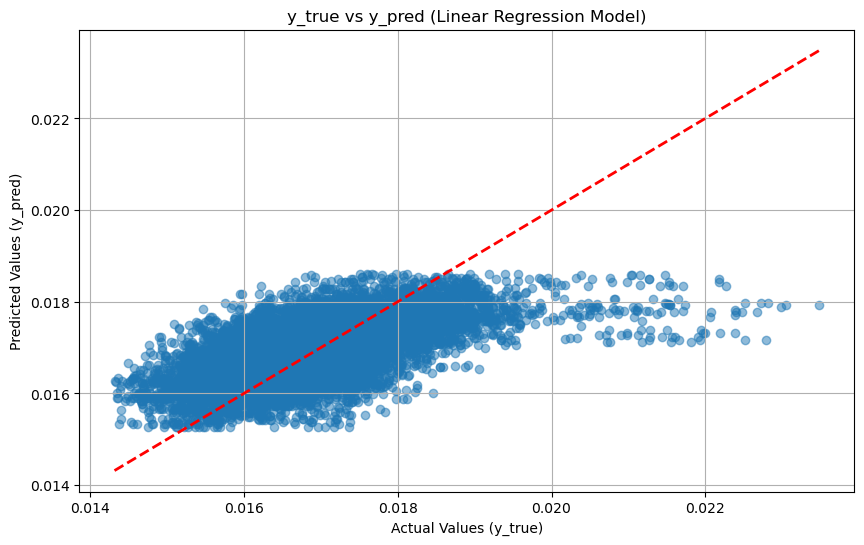

In [25]:
# plot y_true vs y_pred
# Plotting y_true vs y_pred

plt.figure(figsize=(10, 6))

plt.scatter(y_true, y_pred, alpha=0.5)

plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)  # Perfect prediction line

plt.xlabel("Actual Values (y_true)")

plt.ylabel("Predicted Values (y_pred)")

plt.title("y_true vs y_pred (Linear Regression Model)")

plt.grid(True)

plt.show()

Approach 5: SHAP Values (Model-Agnostic Explanation)

Train a surrogate model (e.g., decision tree or random forest) on the feature-performance data and use SHAP (SHapley Additive exPlanations) to measure each feature's contribution to the performance metric.

Steps:

    Train a surrogate model to predict mean_validation_mae based on feature combinations.
    Use SHAP to decompose predictions into feature contributions.

Mean Squared Error (MSE): 4.266278051757813e-07


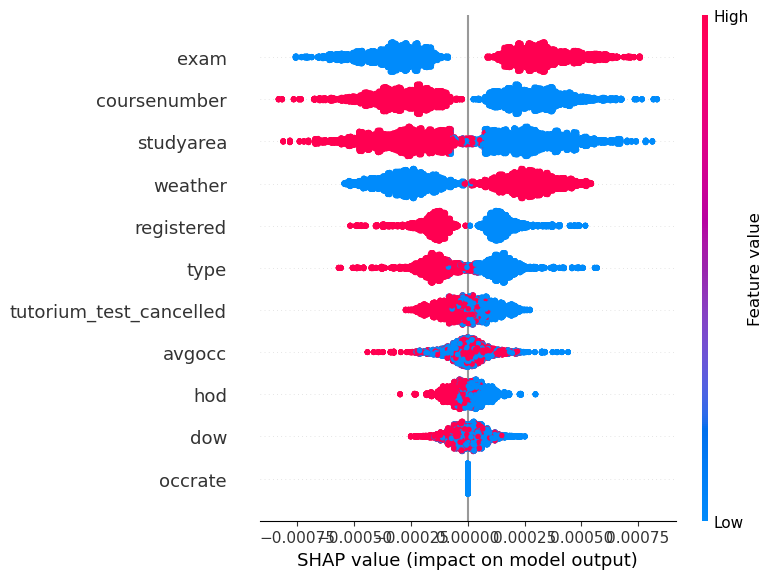

In [26]:
# Create DataFrame

#def calc_regression_feature_impact(dataframe, target):
    
#    binary_features = get_binary_features(dataframe)
#    X = binary_features
#    y = dataframe[target]
    
#    model = LinearRegression().fit(X, y)

#    reg_results = pd.Series(np.append(model.coef_, model.intercept_), index=list(X.columns) + ['intercept'])
    
#    return reg_results, model

import shap
from sklearn.tree import DecisionTreeRegressor


dataframe = df_not_grouped
X = get_binary_features(dataframe)
y = dataframe["test_loss"]


# Fit a Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X, y)

# Predict and calculate MSE

y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error (MSE): {mse}")


# Initialize SHAP TreeExplainer
explainer = shap.TreeExplainer(model)

shap_set = X
shap_values = explainer(shap_set)

# Summary plot for SHAP values
shap.summary_plot(shap_values, shap_set)

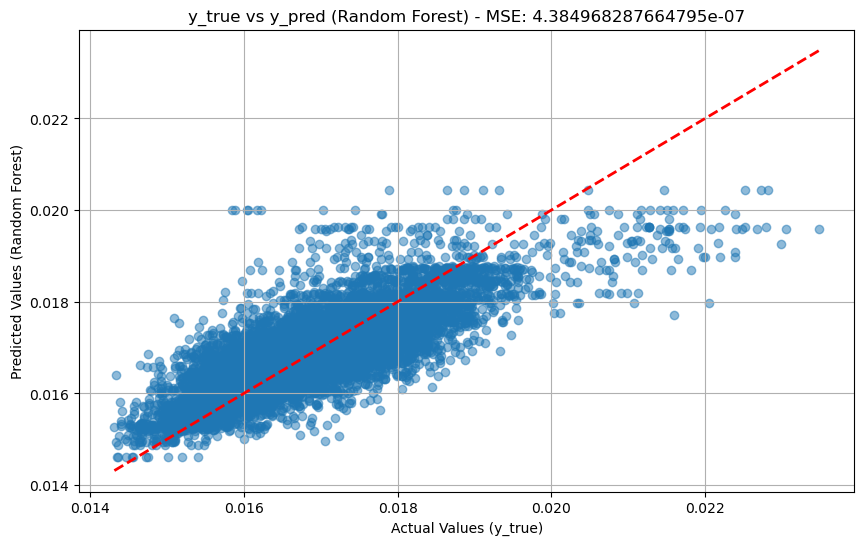

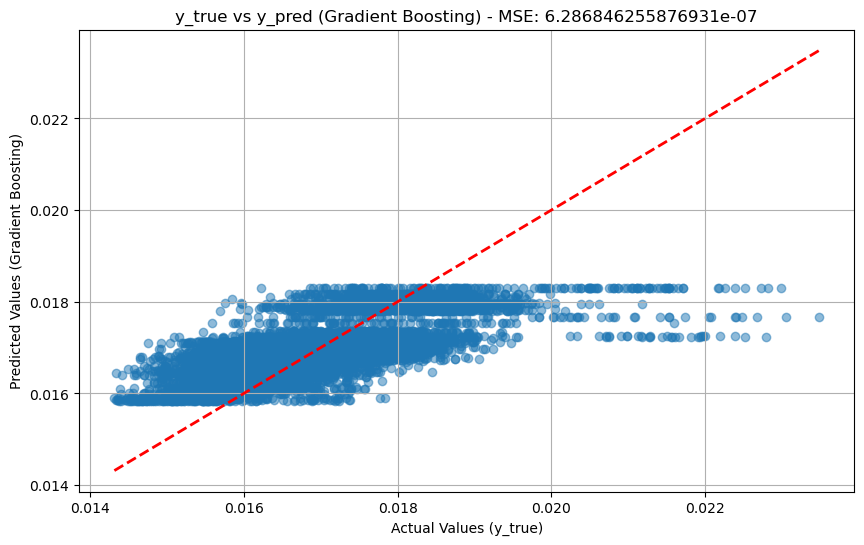

In [27]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

criterion = "absolute_error"
n_estimators = 25
# Define advanced regressors
models = {
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=20, criterion="absolute_error"),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42, n_estimators=20),
}

# Fit models and evaluate
results = {}

for model_name, model in models.items():
    # Fit model
    model.fit(X, y)
    # Predict
    y_pred = model.predict(X)
    # Calculate MSE
    mse = mean_squared_error(y, y_pred)
    results[model_name] = mse
    
    # Plot y_true vs y_pred for each model
    plt.figure(figsize=(10, 6))
    plt.scatter(y, y_pred, alpha=0.5)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)  # Perfect prediction line
    plt.xlabel("Actual Values (y_true)")
    plt.ylabel(f"Predicted Values ({model_name})")
    plt.title(f"y_true vs y_pred ({model_name}) - MSE: {mse}")
    plt.grid(True)
    plt.show()


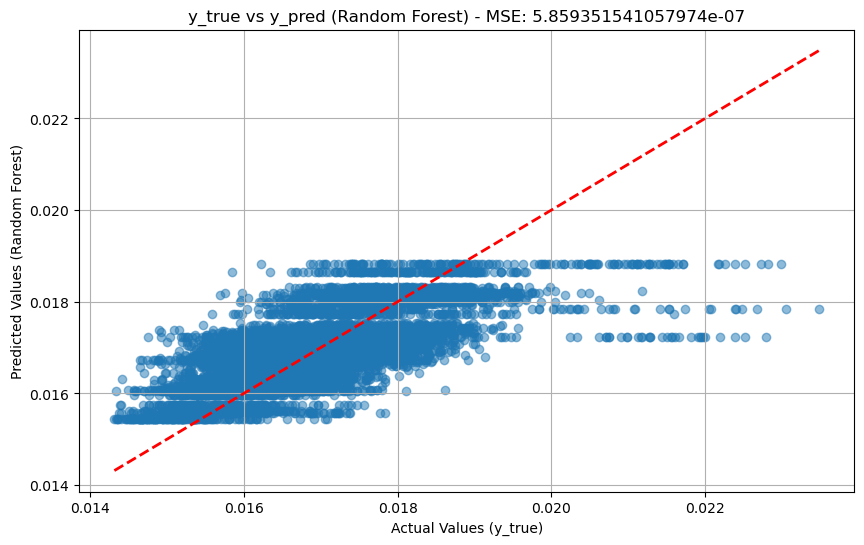

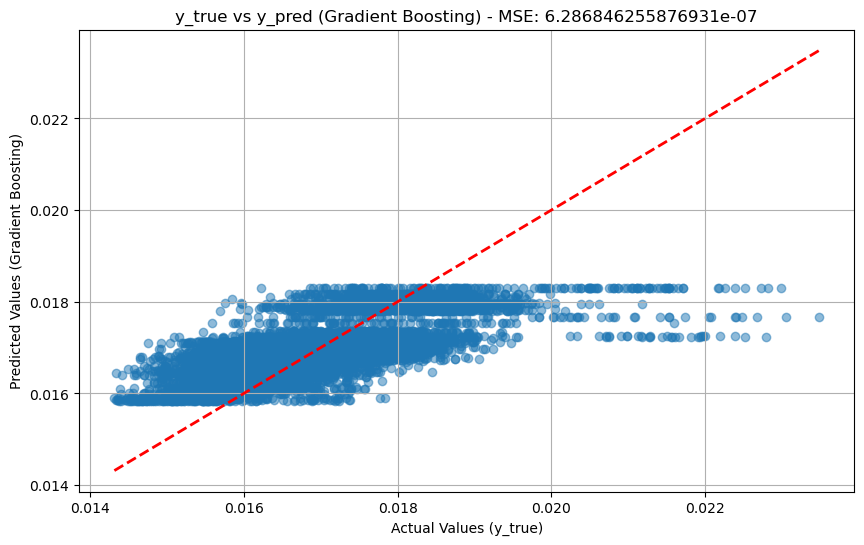

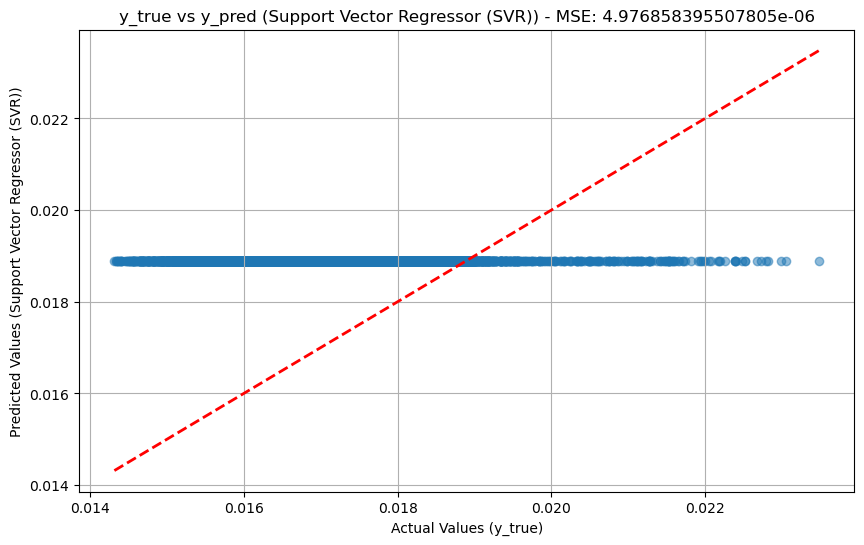

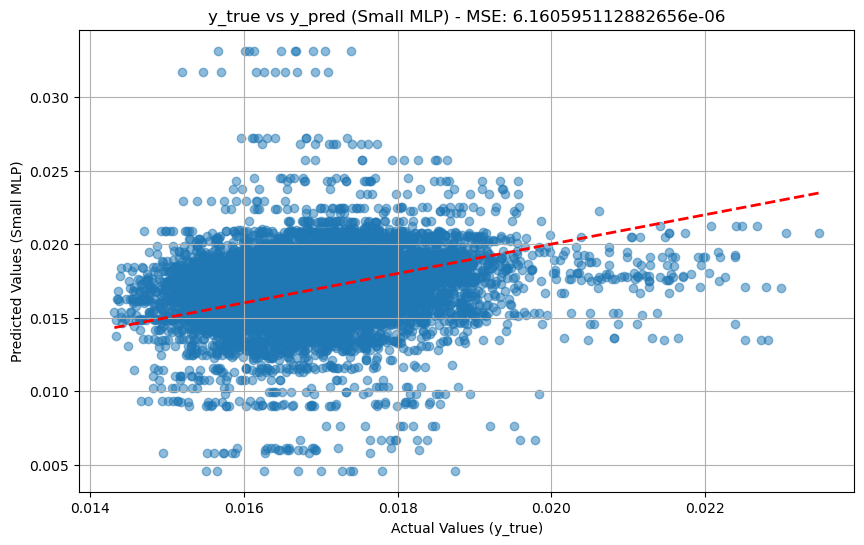

Random Forest - Result: 5.859351541057974e-07
Gradient Boosting - Result: 6.286846255876931e-07
Support Vector Regressor (SVR) - Result: 4.976858395507805e-06
Small MLP - Result: 6.160595112882656e-06


In [28]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Extract features and target
X = get_binary_features(df_not_grouped)
y = df_not_grouped["test_loss"]

# Split data into train/test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models with optimal parameters for binary features and small regression targets
models = {
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=20, max_depth=5),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42, n_estimators=20, learning_rate=0.1, max_depth=3),
    "Support Vector Regressor (SVR)": SVR(kernel="rbf", C=0.5, epsilon=0.05),
    "Small MLP": MLPRegressor(hidden_layer_sizes=(16, 16), activation="relu", solver="adam", learning_rate_init=0.01, max_iter=3000, random_state=42, alpha=0)
}

# Fit models, evaluate, and save plots
results = {}

for model_name, model in models.items():
    # Fit model
    model.fit(X, y)
    # Predict on test data
    y_pred = model.predict(X)
    # Calculate MSE
    mse = mean_squared_error(y, y_pred)
    results[model_name] = mse

    # Save plot of y_true vs y_pred
    plt.figure(figsize=(10, 6))
    plt.scatter(y, y_pred, alpha=0.5)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)  # Perfect prediction line
    plt.xlabel("Actual Values (y_true)")
    plt.ylabel(f"Predicted Values ({model_name})")
    plt.title(f"y_true vs y_pred ({model_name}) - MSE: {mse}")
    plt.grid(True)
    plt.show()
    
# Print MSE for all models
for model_name, result in results.items():
    print(f"{model_name} - Result: {result}")


In [29]:
X_train = X
X_test = X
y_train = y
y_test = y

In [30]:
## Random Forest - Hyperparameter Tuning
#from sklearn.model_selection import GridSearchCV

#param_grid_rf = {
#    "n_estimators": [10, 20],
#    "criterion":["squared_error", "absolute_error"],
#    "max_depth": [3, 5, 10, None],
#    "min_samples_split": [2, 5],
#    "min_samples_leaf": [1, 2, 5]
#}

#grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, scoring="neg_mean_squared_error")
#grid_search_rf.fit(X_train, y_train)

#best_rf = grid_search_rf.best_estimator_
#print("Random Forest - Best Parameters:", grid_search_rf.best_params_)
#y_pred_rf = best_rf.predict(X_test)
#mse_rf = mean_squared_error(y_test, y_pred_rf)
#print("Random Forest - Improved MSE:", mse_rf)


In [31]:
#from sklearn.ensemble import GradientBoostingRegressor
#from sklearn.model_selection import GridSearchCV
#from sklearn.metrics import mean_squared_error

## Define parameter grid
#param_grid_gb = {
#    "loss":["squarred_error", "absolute_error"],
#    "n_estimators": [10, 20],
#    "learning_rate": [0.001, 0.01, 0.1],
#    "max_depth": [3, 5, 7],
#    "subsample": [0.8, 1.0]
#}

## Perform grid search
#grid_search_gb = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid_gb, cv=5, scoring="neg_mean_squared_error")
#grid_search_gb.fit(X_train, y_train)

## Best model and evaluation
#best_gb = grid_search_gb.best_estimator_
#print("Gradient Boosting - Best Parameters:", grid_search_gb.best_params_)
#y_pred_gb = best_gb.predict(X_test)
#mse_gb = mean_squared_error(y_test, y_pred_gb)
#print("Gradient Boosting - Improved MSE:", mse_gb)


In [32]:
# Function to plot the best model's predictions
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error

def plot_best_model(y_test, y_pred, model_name, mse):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Perfect prediction line
    plt.xlabel("Actual Values (y_true)")
    plt.ylabel("Predicted Values (y_pred)")
    plt.title(f"{model_name} - Best Model Predictions\nMSE: {mse}")
    plt.grid(True)
    plt.show()

MLP - Best Parameters: {'alpha': 0, 'batch_size': 8, 'hidden_layer_sizes': 10, 'learning_rate_init': 0.0001, 'max_iter': 2000}
MLP - Improved MSE: 1.1524031174533991e-06


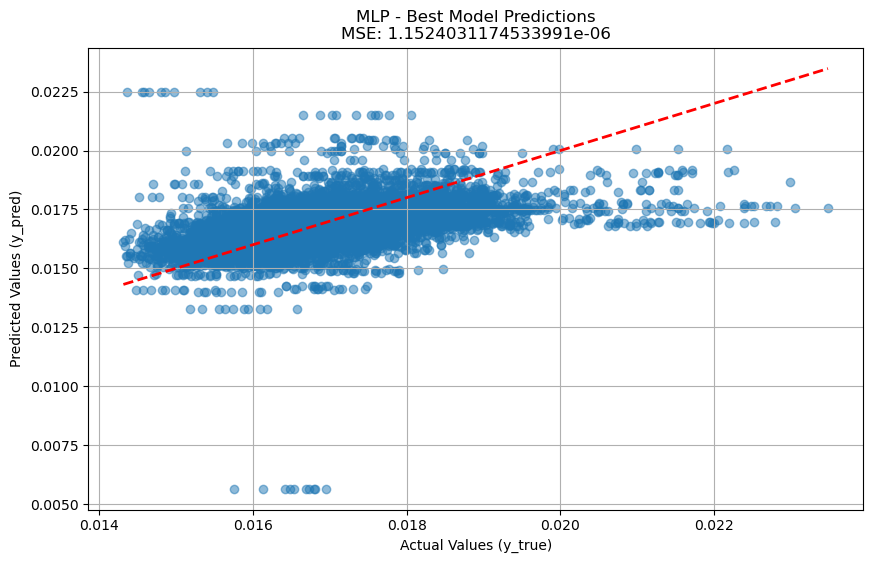

In [35]:
# Small MLP - Hyperparameter Tuning
from sklearn.neural_network import MLPRegressor

param_grid_mlp = {
    "hidden_layer_sizes": [(10)],
    "learning_rate_init": [0.0001],
    "batch_size": [8],
    "alpha": [0],
    "max_iter": [3000]
}

grid_search_mlp = GridSearchCV(MLPRegressor(activation="relu", solver="adam", random_state=42), param_grid_mlp, cv=5, scoring="neg_mean_squared_error")
grid_search_mlp.fit(X_train, y_train)

best_mlp = grid_search_mlp.best_estimator_
print("MLP - Best Parameters:", grid_search_mlp.best_params_)
y_pred_mlp = best_mlp.predict(X_test)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
print("MLP - Improved MSE:", mse_mlp)

plot_best_model(y_test, y_pred_mlp, "MLP", mse_mlp)


# Kinda old!

In [18]:
# fill dataframe with group means and stds



group_list = []

for group, df in results_out.groupby(["features"]):
    print(group)
    print(df["model_losses"].mean())
    print(df["model_losses"].std())
    print()
    # add data to new dataframe
    
    group_list.append(
        (group[0], df["model_losses"].mean(), df["model_losses"].std())
    )
    
df_plot = pd.DataFrame(group_list, columns=["features", "mean", "std"])



('occrate',)
0.020438333333333336
0.0002250896117845821

('occrate_avgocc',)
0.018653666666666666
0.0003666365139117126

('occrate_avgocc_coursenumber',)
0.016270666666666666
0.00020652441340755182

('occrate_coursenumber',)
0.016612666666666668
0.0004147051161166604



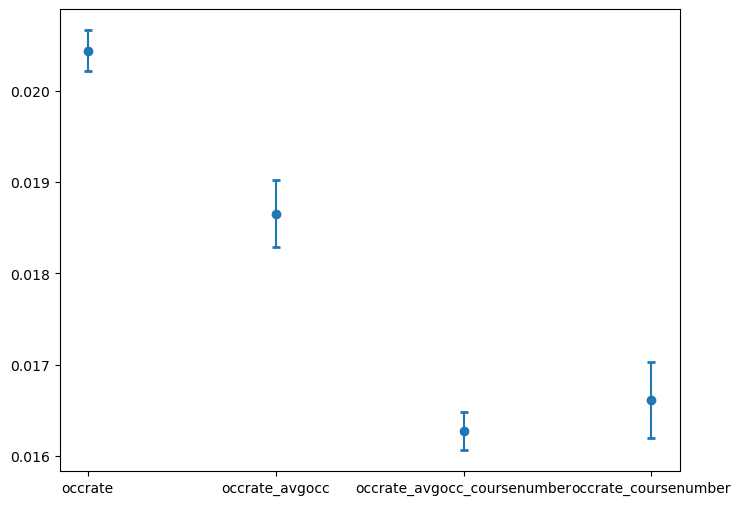

In [19]:
import matplotlib.pyplot as plt

# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))

# Plot mean with error bars (standard deviation)
ax.errorbar(
    df_plot["features"],
    df_plot["mean"],
    yerr=df_plot["std"],
    fmt="o",
    capsize=3,
    capthick=2,
    label="Mean MAE with Std Dev",
)

plt.show()

In [58]:
def advanced_grouping_function(features):
    if "coursenumber" in features:
        return "yes"
    else:
        return "no"
    
    

In [63]:
def advanced_grouping_function(features):
    if "coursenumber" in features:
        return "yes"
    else:
        return "no"
group_by_avgocc = results_out.groupby(results_out["features"].apply(advanced_grouping_function))
group_by_avgocc["model_losses"].mean()


features
no     0.019546
yes    0.016442
Name: model_losses, dtype: float64

In [64]:
def advanced_grouping_function(features):
    if "avgocc" in features:
        return "yes"
    else:
        return "no"
    
group_by_avgocc = results_out.groupby(results_out["features"].apply(advanced_grouping_function))
group_by_avgocc["model_losses"].mean()

features
no     0.018526
yes    0.017462
Name: model_losses, dtype: float64

In [ ]:
pretty_results = results_out[["features", "model_losses", "avg_baselines", "naive_baselines", "zero_baselines"]]

# split features by "_"
pretty_results["features"] = pretty_results["features"].apply(lambda x: x.split("_"))

# do not cut off columns
pd.set_option('display.max_colwidth', None)
pretty_results.reset_index(drop=True, inplace=True)



In [ ]:
#pretty_results.to_csv("pretty_results.csv", index=False)